### Описание проекта.
Пытаемся определить, какие факторы влияют на оценки российских зрителей. Есть ли у россиян "любимый" жанр, который чаще всего смотрят и ставят хорошие оценки. Влияет ли продолжительность фильма или год выпуска на оценки (гипотезы "Люди не любят смотреть слишком длинные фильмы", "люди больше любят "классику" проверенную временем, нежели новые фильмы). Какая страна выпускает лучшие фильмы по мнению зрителей? Возможно на рейтинг фильма влияет наличие в нем конкретного актера или тот факт,что его снял конкретный режиссер.

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_pickle('b1_final.pkl')
df

,Name,Rate,Roles,Country,View,Year,Duration
0,Побег из Шоушенка,9.1,"Тим Роббинс, Морган Фриман",США • драма Режиссёр: Фрэнк Дарабонт,920 397,1994.0,142.0
1,Зеленая миля,9.1,"Том Хэнкс, Дэвид Морс",США • драма Режиссёр: Фрэнк Дарабонт,890 554,1999.0,189.0
2,Форрест Гамп,8.9,"Том Хэнкс, Робин Райт",США • драма Режиссёр: Роберт Земекис,817 092,1994.0,142.0
3,Список Шиндлера,8.8,"Лиам Нисон, Бен Кингсли",США • драма Режиссёр: Стивен Спилберг,476 692,1993.0,195.0
4,1+1,8.8,"Франсуа Клюзе, Омар Си",Франция • драма Режиссёр: Оливье Накаш,1 575K,2011.0,112.0
...,...,...,...,...,...,...,...
995,Голодные игры: Баллада о змеях и певчих птицах,0.0,"Рэйчел Зеглер, Том Блит",США • фантастика Режиссёр: Фрэнсис Лоуренс,0.0,NaN,NaN
996,Леди Баг и Супер-Кот: Пробуждение силы,0.0,"Кристина Валенсуэла, Брайс Папенбрук",США • мультфильм Режиссёр: Джереми Заг,0.0,NaN,NaN
997,Мегалодон,0.0,"Джош Лукас, Фернанда Уррехола",Мексика • ужасы Режиссёр: Адриан Грюнберг,0.0,NaN,NaN
998,Люби снова,0.0,"Приянка Чопра Джонас, Сэм Хьюэн",США • драма Режиссёр: Джеймс С. Страуз,0.0,NaN,NaN


### Посмотрим как распределены оценки, длительность, просмотры и годы выпуска фильмов в нашем датасете.

Cредняя оценка; 6.902040816326529
Модальная оценка; 0    7.8
Name: Rate, dtype: float64


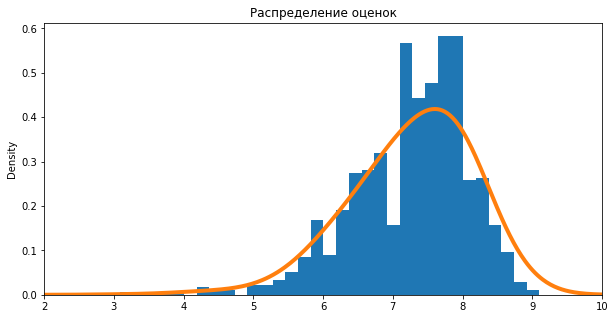

In [42]:
plt.figure(figsize = (10,5))
df.Rate.hist(bins=50, density=True);
df.Rate.plot(kind='kde', linewidth=4)
plt.xlim(2,10)
plt.title("Распределение оценок");
meanmark=df.Rate.mean()
modemark=df.Rate.mode()
print('Cредняя оценка;',meanmark)
print('Модальная оценка;',modemark)

Cредняя продолжительность; 113.7814702920443


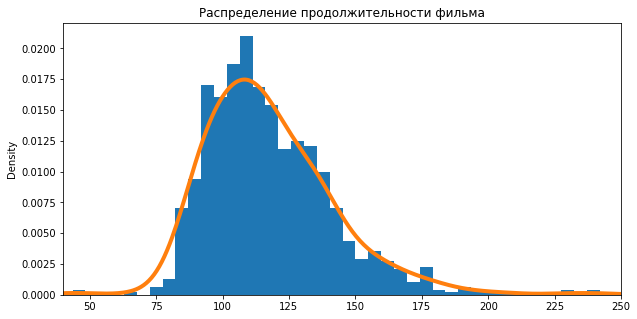

In [45]:
plt.figure(figsize = (10,5))
df.Duration.hist(bins=50, density=True);
df.Duration.plot(kind='kde', linewidth=4)
plt.xlim(40,250)
plt.title("Распределение продолжительности фильма");
meandur=df.Duration.mean()
print('Cредняя продолжительность;',meandur)

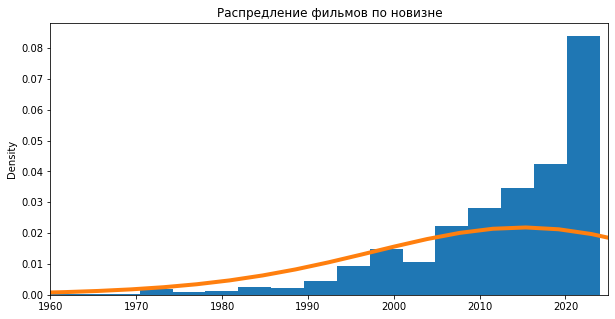

In [18]:
plt.figure(figsize = (10,5))
df.Year.hist(bins=500, density=True);
df.Year.plot(kind='kde', linewidth=4)
plt.xlim(1960,2025)
plt.title("Распредление фильмов по новизне");

In [31]:
df.View=df.View.replace(' ','', regex=True)
df.View= df.View.replace('K', '000', regex=True)
df.View=df.View.fillna(0)
df.View=df.View.astype(int)
df.View

0       920397
1       890554
2       817092
3       476692
4      1575000
        ...   
995          0
996          0
997          0
998          0
999          0
Name: View, Length: 1000, dtype: int32

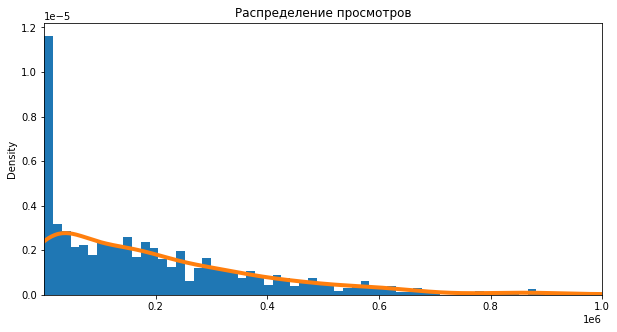

In [39]:
plt.figure(figsize = (10,5))
df.View.hist(bins=100, density=True);
df.View.plot(kind='kde', linewidth=4)
plt.xlim(100,1000000)
plt.title("Распределение просмотров");

Проверим наличие выбросов в просмотрах и в продолжительности

<Axes: >

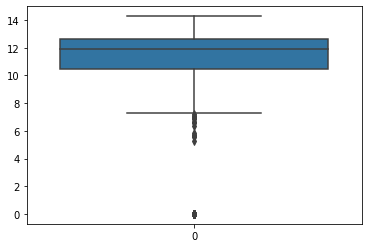

In [40]:
view_log = df[('View')].apply(lambda x: np.log(x + 1))
sns.boxplot(data=view_log)

<Axes: >

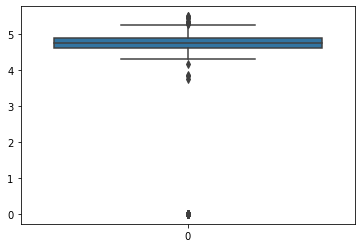

In [46]:
dur_log = df[('Duration')].apply(lambda x: np.log(x + 1))
sns.boxplot(data=dur_log)

Посмотрим, существует ли зависимость между длительностью фильма и его рейтингом. Построим облако рассеивания, чтобы наглядно увидеть связь.

Text(0, 0.5, 'Рейтинг фильма')

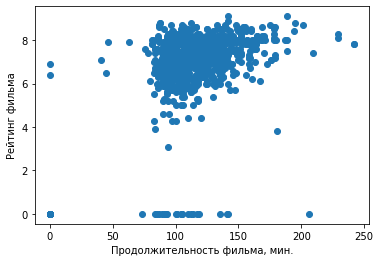

In [47]:
plt.scatter(df['Duration'],df['Rate'])
plt.xlabel('Продолжительность фильма, мин.')
plt.ylabel('Рейтинг фильма')

На графике прослеживается положительная динамика, то есть можно предположить, что чем продолжительность фильма, тем выше его рейтинг. Внизу видны точки в нуле, но это связано с тем, что еще не все фильмы оценены. Теперь рассмотрим, как зависит рейтинг от кол-ва просмотров. Преобразуем данные в датасете, чтобы нарисовать облако рассеивания.

Text(0, 0.5, 'Рейтинг фильма')

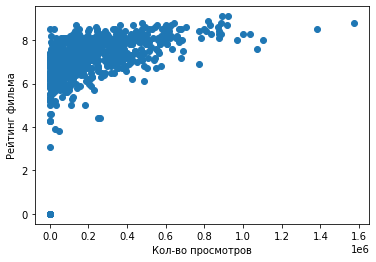

In [48]:
plt.scatter(df['View'],df['Rate'])
plt.xlabel('Кол-во просмотров')
plt.ylabel('Рейтинг фильма')

Видно, что между просмотрами и рейтингом существует положительная взаимосвязь, возможно нелинейная. Соответственно, чем больше люди смотрят фильм, тем выше у него рейтинг. Оценим, связан ли как-то год выпуска с рейтингом. Отдают ли зрители предпочтение старым фильмам? Новым? Поставим для невышедших фильмов 2024 год выпуска, чтобы связать их с будущим, однако для данного графика они все равно не имеют значения, так как еще не были оценены.

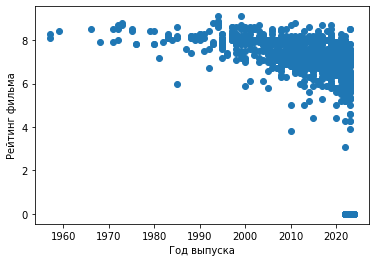

In [49]:
plt.xlabel('Год выпуска')
plt.ylabel('Рейтинг фильма')
df['Year']=df['Year'].fillna(0)
df['Year']=df['Year'].astype(int)
df['Year']=np.where(df['Year']<1895,2024,df['Year'])
plt.scatter(df['Year'],df['Rate'])